Import the necessary libraries

In [5]:
# Base libraries
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import BASE_COLORS
import missingno
%matplotlib inline

#warnings
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

In [6]:
#Upload the csv data set into variable'df' 
df = pd.read_csv("/Users/feli1/Downloads/mlready.csv")

In [7]:
df.head(5)

,customer_number,offer_accepted,reward,mailer_type,income,accounts_open,overdraft_protection,credit_rating,cards_held,homes_owned,household_size,own_your_home,average_balance,q1_balance,q2_balance,q3_balance,q4_balance
0,1,0,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669,877,1095,1002
1,2,0,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39,106,78,366
2,3,0,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367,352,145,242
3,4,0,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578,1760,1119,419
4,5,0,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140,1357,982,365


In [8]:
print(df.shape)

(17976, 17)


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17976 entries, 0 to 17975
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   customer_number       17976 non-null  int64  
 1   offer_accepted        17976 non-null  int64  
 2   reward                17976 non-null  object 
 3   mailer_type           17976 non-null  object 
 4   income                17976 non-null  object 
 5   accounts_open         17976 non-null  int64  
 6   overdraft_protection  17976 non-null  object 
 7   credit_rating         17976 non-null  object 
 8   cards_held            17976 non-null  int64  
 9   homes_owned           17976 non-null  int64  
 10  household_size        17976 non-null  int64  
 11  own_your_home         17976 non-null  object 
 12  average_balance       17976 non-null  float64
 13  q1_balance            17976 non-null  int64  
 14  q2_balance            17976 non-null  int64  
 15  q3_balance         

In [10]:
#Check NaNs Total.
df.isna().sum()

customer_number         0
offer_accepted          0
reward                  0
mailer_type             0
income                  0
accounts_open           0
overdraft_protection    0
credit_rating           0
cards_held              0
homes_owned             0
household_size          0
own_your_home           0
average_balance         0
q1_balance              0
q2_balance              0
q3_balance              0
q4_balance              0
dtype: int64

In [11]:
df.nunique()

customer_number         17976
offer_accepted              2
reward                      3
mailer_type                 2
income                      3
accounts_open               3
overdraft_protection        2
credit_rating               3
cards_held                  4
homes_owned                 3
household_size              8
own_your_home               2
average_balance          4728
q1_balance               2158
q2_balance               1945
q3_balance               2281
q4_balance               2184
dtype: int64

In [12]:
#We will drop customer number as it is of no use.
df.drop(["customer_number"], axis = 1, inplace = True) 

In [13]:
#We sort the data types.
df.dtypes.sort_values()

offer_accepted            int64
accounts_open             int64
cards_held                int64
homes_owned               int64
household_size            int64
q1_balance                int64
q2_balance                int64
q3_balance                int64
q4_balance                int64
average_balance         float64
reward                   object
mailer_type              object
income                   object
overdraft_protection     object
credit_rating            object
own_your_home            object
dtype: object

In [14]:
#We binned the average_balance to categorical variable.
def binning(df):
    if df > 1500:
        return "high_balance"
    elif df > 500:
        return "medium_balance"
    else:
        return "low_balance"
df["average_balance"] = df["average_balance"].apply(binning)

In [15]:
df

,offer_accepted,reward,mailer_type,income,accounts_open,overdraft_protection,credit_rating,cards_held,homes_owned,household_size,own_your_home,average_balance,q1_balance,q2_balance,q3_balance,q4_balance
0,0,Air Miles,Letter,High,1,No,High,2,1,4,No,medium_balance,1669,877,1095,1002
1,0,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,low_balance,39,106,78,366
2,0,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,low_balance,367,352,145,242
3,0,Air Miles,Letter,Medium,2,No,High,1,1,4,No,medium_balance,1578,1760,1119,419
4,0,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,medium_balance,2140,1357,982,365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17971,0,Cash Back,Letter,High,1,No,Low,1,1,5,Yes,low_balance,136,65,71,398
17972,0,Cash Back,Letter,High,1,No,Low,3,1,3,Yes,medium_balance,984,940,943,535
17973,0,Cash Back,Letter,High,1,No,Low,2,1,4,No,medium_balance,918,767,1170,1494
17974,0,Cash Back,Letter,Medium,1,No,Medium,4,2,2,Yes,medium_balance,626,983,865,1615


Check discrete and continuous variables

# Numerical Variable 

#### Store continuous data into a continuous variable and do the same for discrete and categorical. For the categorical data, check if there is some kind of text in a variable so we would need to clean it.

In [16]:
numericals = df.select_dtypes(np.number)
numericals.head()

,offer_accepted,accounts_open,cards_held,homes_owned,household_size,q1_balance,q2_balance,q3_balance,q4_balance
0,0,1,2,1,4,1669,877,1095,1002
1,0,1,2,2,5,39,106,78,366
2,0,2,2,1,2,367,352,145,242
3,0,2,1,1,4,1578,1760,1119,419
4,0,1,2,1,6,2140,1357,982,365


### Discrete Variable 

In [17]:
#the discrete variables will be likely the ones with less unique values
numericals.nunique()

offer_accepted       2
accounts_open        3
cards_held           4
homes_owned          3
household_size       8
q1_balance        2158
q2_balance        1945
q3_balance        2281
q4_balance        2184
dtype: int64

In [18]:
discrete = [i for i in numericals if (len(numericals[i].unique()) < (numericals.shape[0] * 0.01))]

In [19]:
discrete

['offer_accepted',
 'accounts_open',
 'cards_held',
 'homes_owned',
 'household_size']

In [20]:
continuous = list(numericals.drop(columns = discrete).columns)

In [21]:
continuous

['q1_balance', 'q2_balance', 'q3_balance', 'q4_balance']

### Categorical Variable

Check categorical to clean if there is uneeded characters.

In [22]:
categorical = df.select_dtypes(object)

In [23]:
categorical

,reward,mailer_type,income,overdraft_protection,credit_rating,own_your_home,average_balance
0,Air Miles,Letter,High,No,High,No,medium_balance
1,Air Miles,Letter,Medium,No,Medium,Yes,low_balance
2,Air Miles,Postcard,High,No,Medium,Yes,low_balance
3,Air Miles,Letter,Medium,No,High,No,medium_balance
4,Air Miles,Letter,Medium,No,Medium,Yes,medium_balance
...,...,...,...,...,...,...,...
17971,Cash Back,Letter,High,No,Low,Yes,low_balance
17972,Cash Back,Letter,High,No,Low,Yes,medium_balance
17973,Cash Back,Letter,High,No,Low,No,medium_balance
17974,Cash Back,Letter,Medium,No,Medium,Yes,medium_balance


In [24]:
categorical.nunique()

reward                  3
mailer_type             2
income                  3
overdraft_protection    2
credit_rating           3
own_your_home           2
average_balance         3
dtype: int64

In [25]:
for col in df.select_dtypes(include='object').columns:
    print(col)
    print(df[col].unique())

reward
['Air Miles' 'Cash Back' 'Points']
mailer_type
['Letter' 'Postcard']
income
['High' 'Medium' 'Low']
overdraft_protection
['No' 'Yes']
credit_rating
['High' 'Medium' 'Low']
own_your_home
['No' 'Yes']
average_balance
['medium_balance' 'low_balance' 'high_balance']


Get categorical data

In [26]:
categorical

,reward,mailer_type,income,overdraft_protection,credit_rating,own_your_home,average_balance
0,Air Miles,Letter,High,No,High,No,medium_balance
1,Air Miles,Letter,Medium,No,Medium,Yes,low_balance
2,Air Miles,Postcard,High,No,Medium,Yes,low_balance
3,Air Miles,Letter,Medium,No,High,No,medium_balance
4,Air Miles,Letter,Medium,No,Medium,Yes,medium_balance
...,...,...,...,...,...,...,...
17971,Cash Back,Letter,High,No,Low,Yes,low_balance
17972,Cash Back,Letter,High,No,Low,Yes,medium_balance
17973,Cash Back,Letter,High,No,Low,No,medium_balance
17974,Cash Back,Letter,Medium,No,Medium,Yes,medium_balance


In [27]:
categorical_columns = [i for i in categorical if (len(categorical[i].unique()) < (numericals.shape[0] * 0.01))]

## Cleaning categorical data

In [28]:
categorical_columns

['reward',
 'mailer_type',
 'income',
 'overdraft_protection',
 'credit_rating',
 'own_your_home',
 'average_balance']

In [29]:
categorical_df=df[categorical_columns]

### Get categorical features.

In [30]:
categorical_df

,reward,mailer_type,income,overdraft_protection,credit_rating,own_your_home,average_balance
0,Air Miles,Letter,High,No,High,No,medium_balance
1,Air Miles,Letter,Medium,No,Medium,Yes,low_balance
2,Air Miles,Postcard,High,No,Medium,Yes,low_balance
3,Air Miles,Letter,Medium,No,High,No,medium_balance
4,Air Miles,Letter,Medium,No,Medium,Yes,medium_balance
...,...,...,...,...,...,...,...
17971,Cash Back,Letter,High,No,Low,Yes,low_balance
17972,Cash Back,Letter,High,No,Low,Yes,medium_balance
17973,Cash Back,Letter,High,No,Low,No,medium_balance
17974,Cash Back,Letter,Medium,No,Medium,Yes,medium_balance


####  Load the continuous and discrete variables into continuous_df and discrete_df variables.

In [31]:
continuous_df = numericals.drop(columns = discrete)

In [32]:
continuous_df.head()

,q1_balance,q2_balance,q3_balance,q4_balance
0,1669,877,1095,1002
1,39,106,78,366
2,367,352,145,242
3,1578,1760,1119,419
4,2140,1357,982,365


In [33]:
discrete_df = numericals[discrete]

In [34]:
discrete_df

,offer_accepted,accounts_open,cards_held,homes_owned,household_size
0,0,1,2,1,4
1,0,1,2,2,5
2,0,2,2,1,2
3,0,2,1,1,4
4,0,1,2,1,6
...,...,...,...,...,...
17971,0,1,1,1,5
17972,0,1,3,1,3
17973,0,1,2,1,4
17974,0,1,4,2,2


#####  Plot a correlation matrix

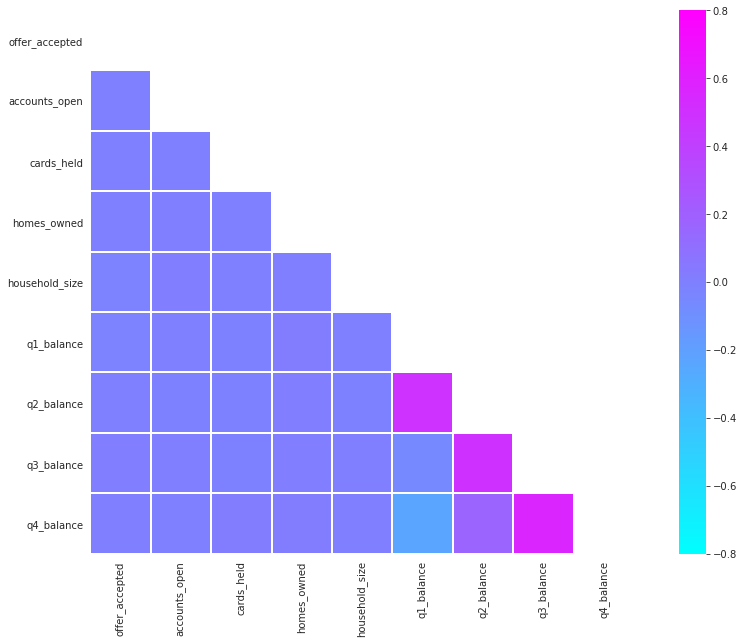

In [35]:
mask = np.zeros_like(numericals.corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(16, 10))
    ax = sns.heatmap(numericals.corr(), mask=mask,
                     square=True, linewidths=1, cmap="cool",
                     vmax = 0.8, vmin = -0.8)

#### Continuous 

In [36]:
continuous[:4]

['q1_balance', 'q2_balance', 'q3_balance', 'q4_balance']

In [37]:
def df_hist(df):
    sns.set(rc={'figure.figsize':(10,4)})
    for i, col in enumerate(df):
        plt.figure(i)
        sns.distplot(df[col], color = list(BASE_COLORS.keys())[i])
        
    plt.show()

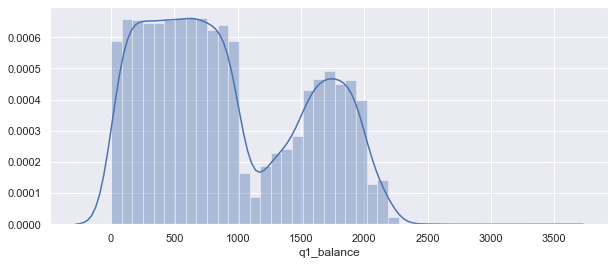

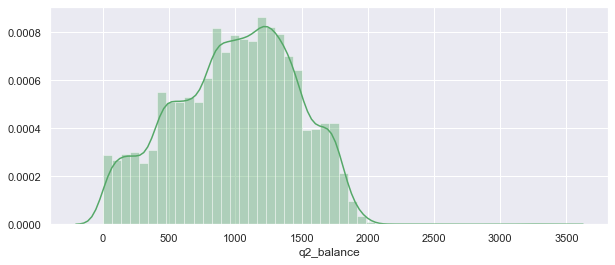

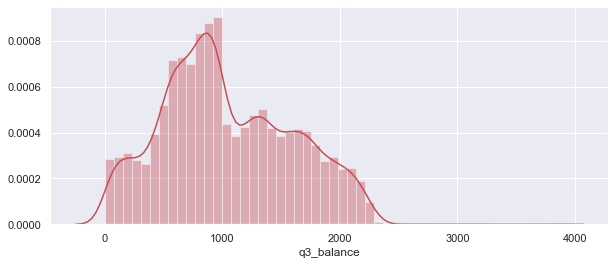

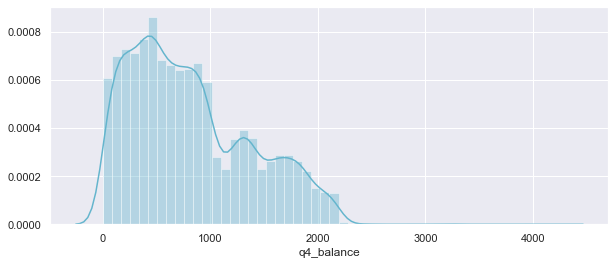

In [38]:
df_hist(continuous_df)

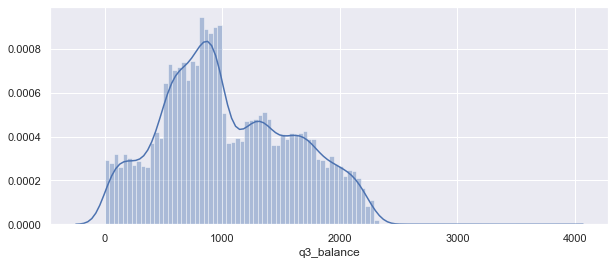

In [39]:
sns.distplot(continuous_df["q3_balance"], bins = 100);

In [40]:
continuous_df["q1_balance"].value_counts()

675     23
81      23
676     22
823     22
480     21
        ..
2080     1
1309     1
2502     1
2310     1
2092     1
Name: q1_balance, Length: 2158, dtype: int64

#### Look for outliers in the continuous variables we have found.

Check for outliers of continuous variables

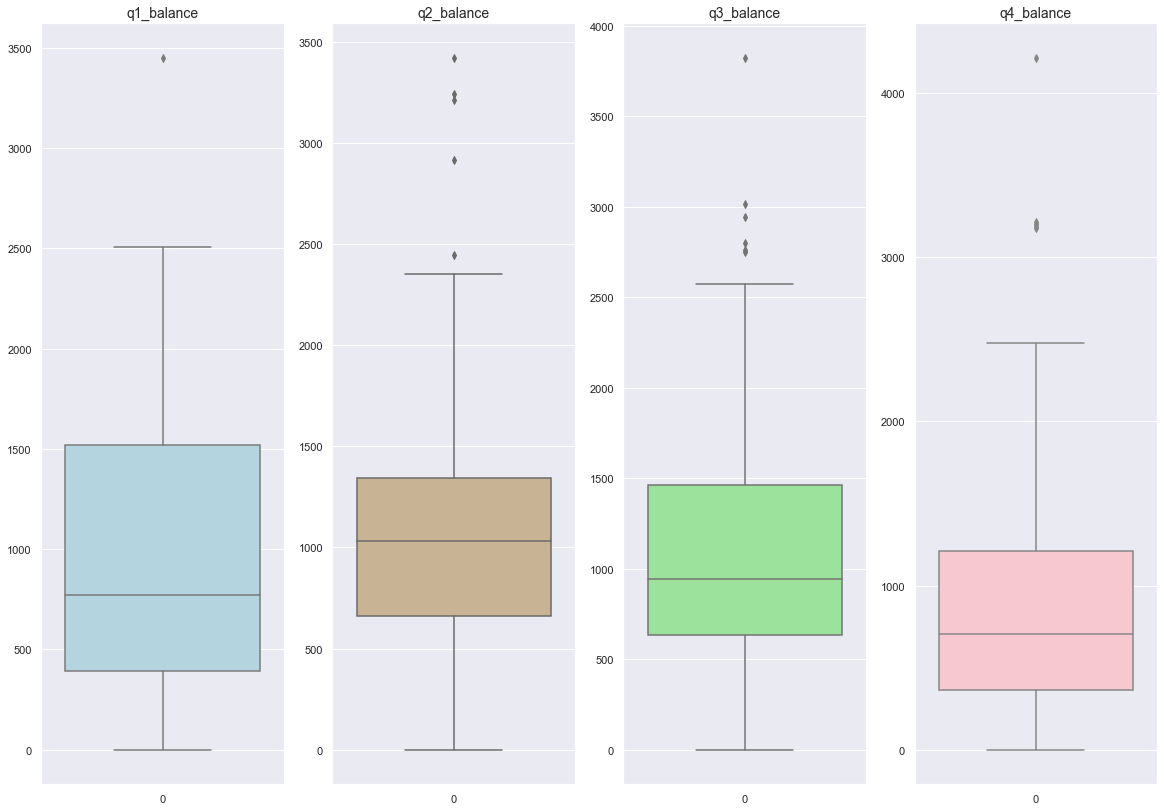

In [41]:
box_colors = ["lightblue", "tan","lightgreen","pink","cyan"]

f, ax = plt.subplots(1, 4, figsize=(20,14))


for i, col in enumerate(continuous[:4]):
    sns.boxplot(data = continuous_df[col], ax = ax[i], color = box_colors[i])
    ax[i].set_title(col, fontsize = 14)
plt.show();

#### We observe quite a few outliers in the Q1,2,3,4 and decided to make it a categorical variable 

# Feature extraction

In [42]:
categorical_df.head()

,reward,mailer_type,income,overdraft_protection,credit_rating,own_your_home,average_balance
0,Air Miles,Letter,High,No,High,No,medium_balance
1,Air Miles,Letter,Medium,No,Medium,Yes,low_balance
2,Air Miles,Postcard,High,No,Medium,Yes,low_balance
3,Air Miles,Letter,Medium,No,High,No,medium_balance
4,Air Miles,Letter,Medium,No,Medium,Yes,medium_balance


IndexError: index 3 is out of bounds for axis 0 with size 3

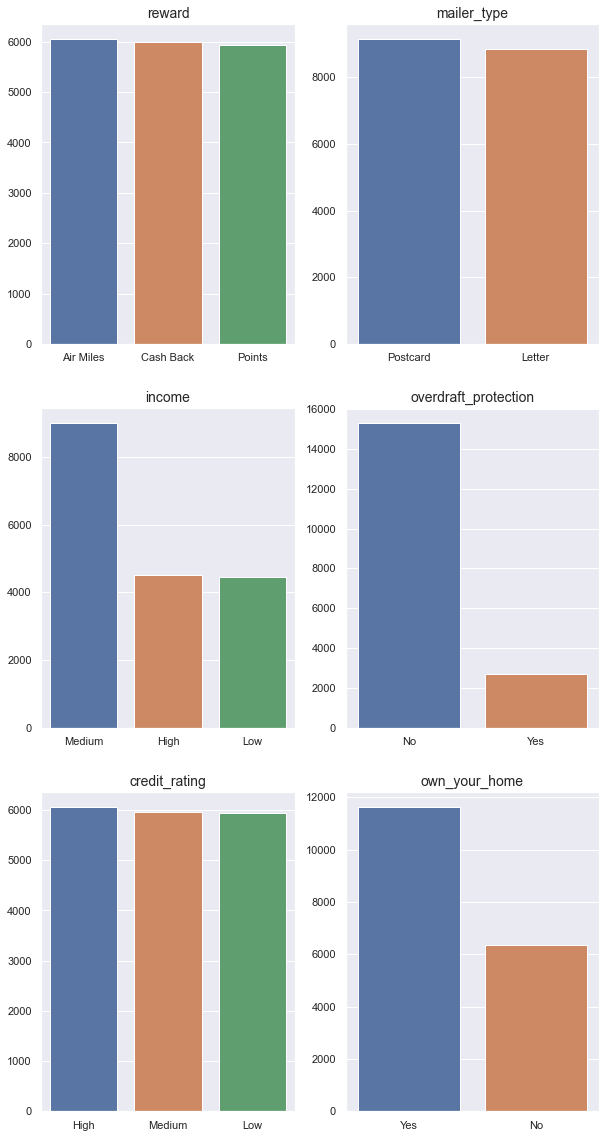

In [43]:
f, axes = plt.subplots(int(categorical.shape[1] / 2), 2, figsize=(10, 20))

for i, col in enumerate(categorical):

    sns.barplot(x = categorical[col].value_counts().index,
                y = categorical[col].value_counts(),
                ax = axes[int(i / 2)][int(i) % 2])  
    axes[int(i / 2)][int(i) % 2].set_title(col, fontsize = 14)
    axes[int(i / 2)][int(i) % 2].set_ylabel("")

plt.show()

In [44]:
# Check overdraft protection  
L = categorical["overdraft_protection"].apply(lambda x: x[-2:])
overdraft_protection = categorical["overdraft_protection"].apply(lambda x: x[:-2])

In [45]:
overdraft_protection.value_counts()

     15300
Y     2676
Name: overdraft_protection, dtype: int64

### Continuous

In [46]:
continuous_df["q1_balance"].value_counts()

675     23
81      23
676     22
823     22
480     21
        ..
2080     1
1309     1
2502     1
2310     1
2092     1
Name: q1_balance, Length: 2158, dtype: int64

In [47]:
continuous_df["q2_balance"].value_counts()

1060    30
1197    26
1271    25
867     24
826     24
        ..
1878     1
1862     1
1846     1
1814     1
0        1
Name: q2_balance, Length: 1945, dtype: int64

In [48]:
continuous_df["q3_balance"].value_counts()

809     30
833     27
842     26
972     26
997     26
        ..
2218     1
123      1
2267     1
2219     1
0        1
Name: q3_balance, Length: 2281, dtype: int64

In [49]:
continuous_df["q4_balance"].value_counts()

419     26
497     26
154     26
297     24
434     24
        ..
2004     1
1106     1
1917     1
2040     1
1892     1
Name: q4_balance, Length: 2184, dtype: int64

In [54]:
#continuous.remove("q1_balance")
#continuous.remove("q2_balance")
for cont_var in continuous:
    maximum = df[cont_var].max()
    minimum = df[cont_var].min()
    df[cont_var] = df[cont_var].apply(lambda x: (x - minimum) / (maximum - minimum))

In [55]:
df[continuous].head()

,q3_balance,q4_balance
0,0.286424,0.237722
1,0.020403,0.086833
2,0.037928,0.057414
3,0.292702,0.099407
4,0.256866,0.086595


# Data cleaning and wrangling


### Categorical

In [56]:
# Response to bool 
df["offer_accepted"] = df["offer_accepted"].apply(lambda x: 1 if x == "Yes" else 0)
df["mailer_type"] = df["mailer_type"].apply(lambda x: 1 if x == "Letter" else 0)
df["overdraft_protection"] = df["overdraft_protection"].apply(lambda x: 1 if x == "Yes" else 0)
df["own_your_home"] = df["own_your_home"].apply(lambda x: 1 if x == "Yes" else 0)


In [57]:
df

,offer_accepted,reward,mailer_type,income,accounts_open,overdraft_protection,credit_rating,cards_held,homes_owned,household_size,own_your_home,average_balance,q1_balance,q2_balance,q3_balance,q4_balance
0,0,Air Miles,1,High,1,0,High,2,1,4,0,medium_balance,1669,877,0.286424,0.237722
1,0,Air Miles,1,Medium,1,0,Medium,2,2,5,1,low_balance,39,106,0.020403,0.086833
2,0,Air Miles,0,High,2,0,Medium,2,1,2,1,low_balance,367,352,0.037928,0.057414
3,0,Air Miles,1,Medium,2,0,High,1,1,4,0,medium_balance,1578,1760,0.292702,0.099407
4,0,Air Miles,1,Medium,1,0,Medium,2,1,6,1,medium_balance,2140,1357,0.256866,0.086595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17971,0,Cash Back,1,High,1,0,Low,1,1,5,1,low_balance,136,65,0.018572,0.094425
17972,0,Cash Back,1,High,1,0,Low,3,1,3,1,medium_balance,984,940,0.246665,0.126928
17973,0,Cash Back,1,High,1,0,Low,2,1,4,0,medium_balance,918,767,0.306042,0.354448
17974,0,Cash Back,1,Medium,1,0,Medium,4,2,2,1,medium_balance,626,983,0.226262,0.383155


In [58]:
#copy
final_df = df

## Ordinal Encoding

Ordinal encoders:
reward 
income_level
credit_rating
 


In [59]:
for col in df.select_dtypes(include='object').columns:
    print(col)
    print(df[col].unique())

reward
['Air Miles' 'Cash Back' 'Points']
income
['High' 'Medium' 'Low']
credit_rating
['High' 'Medium' 'Low']
average_balance
['medium_balance' 'low_balance' 'high_balance']


In [60]:
final_df["reward"] = final_df["reward"].map({"Air Miles" : 0, "Cash Back" : 1, "Points" : 2})
final_df["income"] = final_df["income"].map({"High" : 0, "Medium" : 1, "Low" : 2})
final_df["credit_rating"] = final_df["credit_rating"].map({"High" : 0, "Medium" : 1, "Low" : 2})
final_df["average_balance"] = final_df["average_balance"].map({"low_balance" : 0, "medium_balance" : 1, "high_balance" : 2})

In [61]:
final_df

,offer_accepted,reward,mailer_type,income,accounts_open,overdraft_protection,credit_rating,cards_held,homes_owned,household_size,own_your_home,average_balance,q1_balance,q2_balance,q3_balance,q4_balance
0,0,0,1,0,1,0,0,2,1,4,0,1,1669,877,0.286424,0.237722
1,0,0,1,1,1,0,1,2,2,5,1,0,39,106,0.020403,0.086833
2,0,0,0,0,2,0,1,2,1,2,1,0,367,352,0.037928,0.057414
3,0,0,1,1,2,0,0,1,1,4,0,1,1578,1760,0.292702,0.099407
4,0,0,1,1,1,0,1,2,1,6,1,1,2140,1357,0.256866,0.086595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17971,0,1,1,0,1,0,2,1,1,5,1,0,136,65,0.018572,0.094425
17972,0,1,1,0,1,0,2,3,1,3,1,1,984,940,0.246665,0.126928
17973,0,1,1,0,1,0,2,2,1,4,0,1,918,767,0.306042,0.354448
17974,0,1,1,1,1,0,1,4,2,2,1,1,626,983,0.226262,0.383155


In [69]:
final_df.info() # Types changed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17976 entries, 0 to 17975
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   offer_accepted        17976 non-null  int64  
 1   reward                17976 non-null  int64  
 2   mailer_type           17976 non-null  int64  
 3   income                17976 non-null  int64  
 4   accounts_open         17976 non-null  int64  
 5   overdraft_protection  17976 non-null  int64  
 6   credit_rating         17976 non-null  int64  
 7   cards_held            17976 non-null  int64  
 8   homes_owned           17976 non-null  int64  
 9   household_size        17976 non-null  int64  
 10  own_your_home         17976 non-null  int64  
 11  average_balance       17976 non-null  int64  
 12  q1_balance            17976 non-null  int64  
 13  q2_balance            17976 non-null  int64  
 14  q3_balance            17976 non-null  float64
 15  q4_balance         

###  LogisticRegression models with random sampling to control the imbalance

In [71]:
# sklearn
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split


#Creating a random under sample
rus = RandomUnderSampler()
X = final_df[["mailer_type","reward","income","accounts_open","overdraft_protection","credit_rating","cards_held",
              "homes_owned","household_size","own_your_home","average_balance","q1_balance","q2_balance","q2_balance","q3_balance","q4_balance"]]
transformer = StandardScaler().fit(X)
X = transformer.transform(X)
y = final_df['offer_accepted']
X_rus, y_rus = rus.fit_sample(X, y)

#x- y split and applying the model
X_train, X_test, y_train, y_test = train_test_split(X_rus,
                                                    y_rus, test_size=0.25,
                                                    random_state=101)
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)

y_pred = logmodel.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logmodel.score(X_test, y_test)))

ValueError: The target 'y' needs to have more than 1 class. Got 1 class instead

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test,predictions)
index = ['No', 'Yes']
columns = ['No', 'Yes']
cm_df = pd.DataFrame(cm,columns,index)
plt.figure(figsize=(10,6))
sns.heatmap(cm_df, annot=True, fmt='g')